In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
import f90nml
from importlib import reload
import sys
sys.path.append('../ice4')
import retrievestuff as rs
import weibull

In [2]:
%matplotlib notebook

In [3]:
# Have to do this in case of different operating systems
if platform == "linux" or platform == "darwin":
    slash = '/'
else: # This is assumed to be Windows
    slash = '\\'
#print(slash)

In [8]:
foldername = "Case2.1"; filename = "surface_filtered.txt"

# Load a height file (for synthetic data)
#filename = "surface.txt"

sollast = np.loadtxt(foldername+slash+filename)
Ny, Nx = np.shape(sollast); #print(sollast.shape)
Ntot = np.size(sollast)
print("Nx =", Nx)
print("Ny =", Ny)
print('Npts = ', Ntot)

# Get other parameters
params = f90nml.read(foldername+slash+'parameters.nml')
Lx = params['parameters']['Lx']; print("Lx =", Lx)
Ly = params['parameters']['Ly']; print("Ly =", Ly)

Nx = 41
Ny = 43
Npts =  1763
Lx = 22.678572
Ly = 23.245536299999998


In [10]:
x = np.linspace(0,Lx,Nx); #print(x[1]-x[0])
y = np.linspace(0,Ly,Ny); 
xgrid,ygrid = np.meshgrid(x,y); #print(xgrid.shape)
dx = x[1]-x[0]
dy = y[1]-y[0]

In [15]:
nbins_max = 14
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says nbins = ', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2max = .06
Z2bins = np.linspace(0,Z2max,nbins-1)
#counts, bins, meanZ2, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins, levels=3)
counts, bins, meanZ2= rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins)

Sturges rule says nbins =  11
Using nbins =  11


C:\Users\Margaret Berrens\New folder\New folder\New folder\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


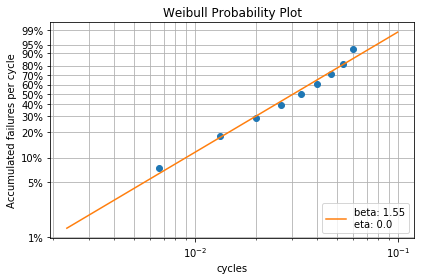

fit method          linear regression
p_value                   1.58627e-07
r_squared                    0.983796
confidence                        0.9
beta lower limit             0.963988
beta nominal                  1.54842
beta upper limit              2.48717
eta lower limit             0.0261139
eta nominal                 0.0386567
eta upper limit             0.0572238
mean life                   0.0347713
median life                 0.0305089
b10 life                   0.00903753
dtype: object


In [19]:
#does weibull analysis on experimental data
analysis = weibull.Analysis(bins)
analysis.fit(method='lr')
plt.figure()
analysis.probplot()
print(analysis.stats)